In [1631]:
#importing libraries
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt

In [1632]:
confirmed_cases = pd.read_csv('US_confirmed.csv')
deaths_reported = pd.read_csv('US_deaths.csv')
recovered_cases = pd.read_csv('US_recovered.csv')

cols = confirmed_cases.keys()

confirmed = confirmed_cases.loc[:, cols[4]:cols[-1]]
deaths = deaths_reported.loc[:, cols[4]:cols[-1]]
recoveries = recovered_cases.loc[:, cols[4]:cols[-1]]

In [1633]:
columns=confirmed.keys()

dates=pd.to_datetime(columns)

rowsnew=confirmed.values.tolist()
rowsdeaths=deaths.values.tolist()
rowsrecoveries=recoveries.values.tolist()

CovidConfirmedData = pd.Series(rowsnew[0], dates)
CovidDeathsData = pd.Series(rowsdeaths[0], dates)
CovidRecoveredData = pd.Series(rowsrecoveries[0], dates)

In [1634]:
CovidConfirmedData

2020-01-22           1
2020-01-23           1
2020-01-24           2
2020-01-25           2
2020-01-26           5
                ...   
2022-03-19    79728165
2022-03-20    79734788
2022-03-21    79780432
2022-03-22    79803443
2022-03-23    79844430
Length: 792, dtype: int64

In [1635]:
CovidDeathsData

2020-01-22         0
2020-01-23         0
2020-01-24         0
2020-01-25         0
2020-01-26         0
               ...  
2022-03-19    971087
2022-03-20    971162
2022-03-21    972658
2022-03-22    973213
2022-03-23    974830
Length: 792, dtype: int64

In [1636]:
CovidRecoveredData

2020-01-22    0
2020-01-23    0
2020-01-24    0
2020-01-25    0
2020-01-26    0
             ..
2022-03-19    0
2022-03-20    0
2022-03-21    0
2022-03-22    0
2022-03-23    0
Length: 792, dtype: int64

### Holt’s Method

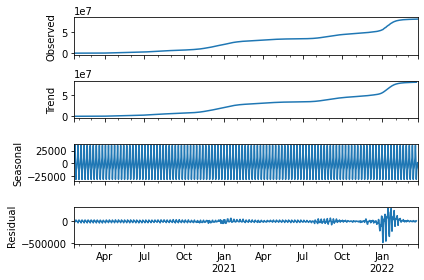

In [1637]:
from statsmodels.tsa.seasonal import seasonal_decompose
results=seasonal_decompose(CovidConfirmedData)
results.plot();

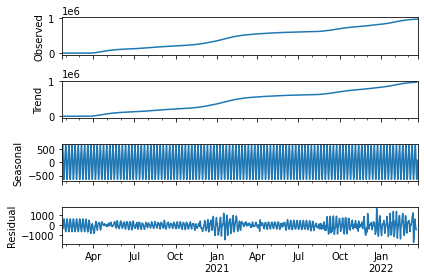

In [1638]:
from statsmodels.tsa.seasonal import seasonal_decompose
results2=seasonal_decompose(CovidDeathsData)
results2.plot();

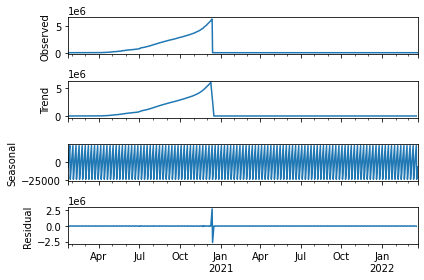

In [1639]:
from statsmodels.tsa.seasonal import seasonal_decompose
results3=seasonal_decompose(CovidRecoveredData)
results3.plot();

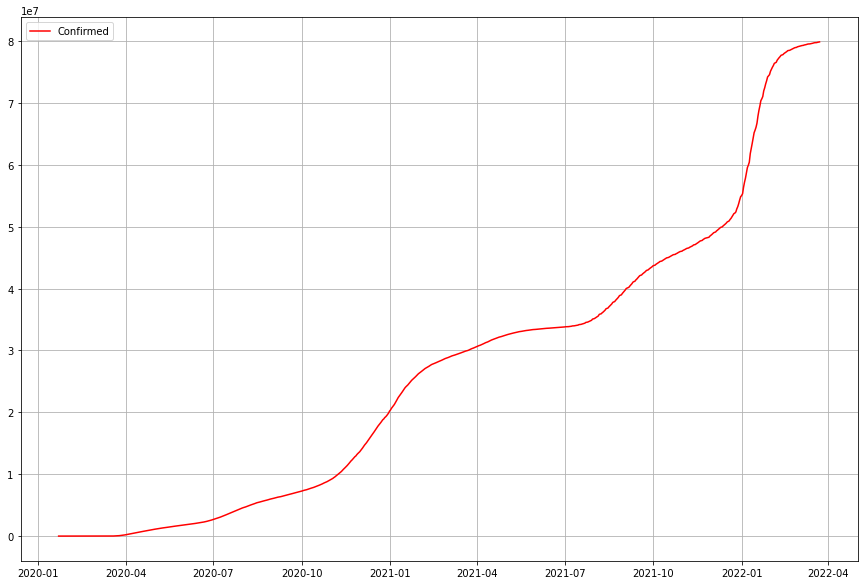

In [1640]:
#plotting the data set for confirmed cases
plt.figure(figsize=[15,10])
plt.grid(True)
plt.plot(CovidConfirmedData,label='Confirmed',color="red")
plt.legend(loc=2)


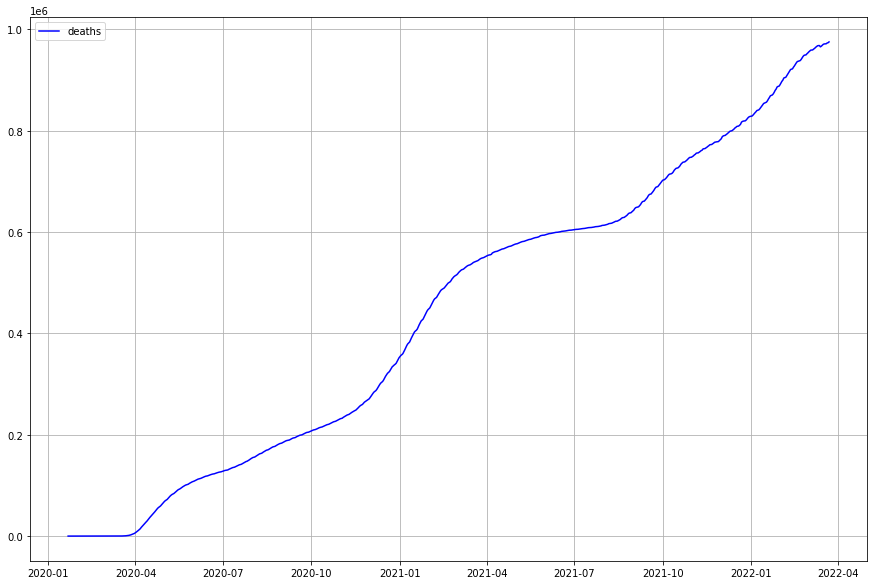

In [1641]:
#plotting the data set for deaths
plt.figure(figsize=[15,10])
plt.grid(True)
plt.plot(CovidDeathsData,label='deaths',color="blue")
plt.legend(loc=2)


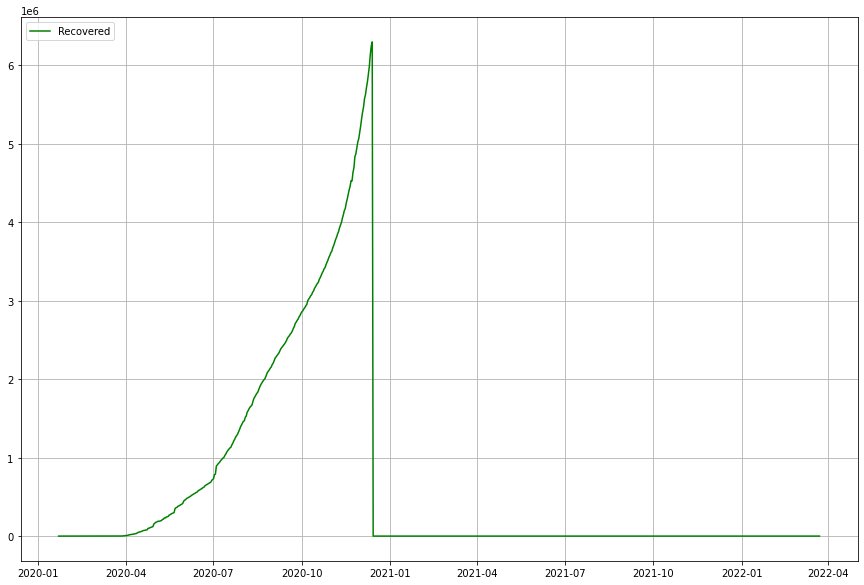

In [1642]:
#plotting the data set for Recovered cases
plt.figure(figsize=[15,10])
plt.grid(True)
plt.plot(CovidRecoveredData,label='Recovered',color="green")
plt.legend(loc=2)


#### Holt's Method Linear trend for confirmed cases

In [1643]:
#splitting into train and test data sets for confirmed cases
columns=confirmed.keys()

train=confirmed_cases.loc[:, cols[70]:cols[130]]
test=confirmed_cases.loc[:, cols[130]:cols[154]]

rowstrain=train.values.tolist()
rowstest=test.values.tolist()

trainkeys = train.keys()
testkeys = test.keys()

traindates=pd.to_datetime(trainkeys)
testdates=pd.to_datetime(testkeys)

In [1644]:
traindataseries =pd.Series(rowstrain[0], traindates)
testdataseries = pd.Series(rowstest[0], testdates)

In [1645]:
fit1 = Holt(traindataseries).fit(smoothing_level=0.8, smoothing_slope=0.2, optimized=False)

fit2 = Holt(traindataseries).fit(smoothing_level=0.8, smoothing_slope=0.1, optimized=False)

fit3 = Holt(traindataseries).fit(smoothing_level=0.8, smoothing_slope=0.8, optimized=True)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


In [1646]:
pred1=fit1.forecast(25)
pred2=fit2.forecast(25)
pred3=fit3.forecast(25)

In [1647]:
#mean Square error for predictions
sse1 = np.sqrt(np.mean(np.square(rowstest[0] - pred1.values)))
sse2 = np.sqrt(np.mean(np.square(rowstest[0] - pred2.values)))
sse3 = np.sqrt(np.mean(np.square(rowstest[0] - pred3.values)))


In [1648]:
sse1

15310.27295076515

In [1649]:
sse2

25269.35976827017

In [1650]:
sse3

33506.74119705997

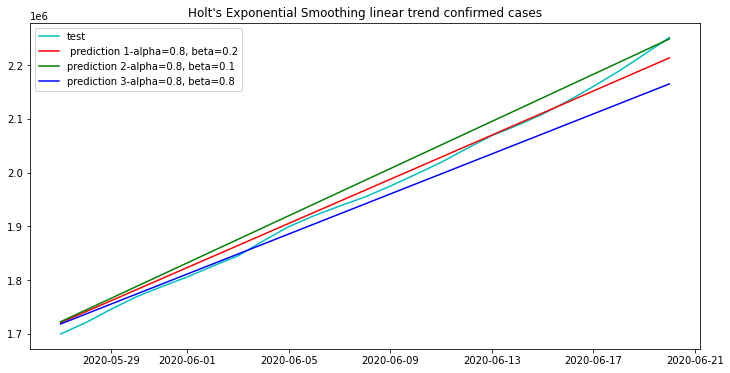

In [1651]:
#plotting the predictions plots with test data set to compare

fig, ax = plt.subplots(figsize=(12, 6))
ax.plot(testdates, rowstest[0], label="test",color="c")
ax.plot(testdates, pred1, label=" prediction 1-alpha="+str(fit1.params['smoothing_level'])[:4]+", beta="+str(fit1.params['smoothing_slope'])[:4], color="red")
ax.plot(testdates, pred2, label="prediction 2-alpha="+str(fit2.params['smoothing_level'])[:4]+", beta="+str(fit2.params['smoothing_slope'])[:4], color="green")
ax.plot(testdates, pred3, label="prediction 3-alpha="+str(fit3.params['smoothing_level'])[:4]+", beta="+str(fit3.params['smoothing_slope'])[:4], color="blue")
#ax.plot(traindates,rowstrain[0],label="train",color="grey")
#ax.plot(traindates, fit1.fittedvalues, color=c)
#ax.plot(testdates,rowstest[0], color="gray")
#ax.plot(testdates, pred1.values, linestyle='--', color='blue', label="pred1");
#ax.plot(testdates, pred2.values, linestyle='--', color='green', label="pred2");
#ax.plot(testdates, pred3.values, linestyle='--', color='red', label="pred3");
'''for p, f, c in zip((pred1,pred2,pred3),(fit1, fit2, fit3),('red','green','blue')):
    #ax.plot(traindates, f.fittedvalues, color=c)
    ax.plot(testdates, rowstest[0], color=c)
    ax.plot(testdates, p, label="alpha="+str(f.params['smoothing_level'])[:4]+", beta="+str(f.params['smoothing_slope'])[:4], color=c)'''
plt.title("Holt's Exponential Smoothing linear trend confirmed cases")
plt.legend();

In [1652]:
fit1.fittedvalues

2020-03-28    1.435440e+05
2020-03-29    1.441891e+05
2020-03-30    1.571165e+05
2020-03-31    1.787982e+05
2020-04-01    2.063643e+05
                  ...     
2020-05-23    1.625654e+06
2020-05-24    1.646278e+06
2020-05-25    1.666083e+06
2020-05-26    1.684732e+06
2020-05-27    1.702820e+06
Length: 61, dtype: float64

In [1653]:
fcast1 = fit1.forecast(5).rename("Holt's linear trend")
fcast1

2020-05-28    1.720953e+06
2020-05-29    1.741467e+06
2020-05-30    1.761980e+06
2020-05-31    1.782493e+06
2020-06-01    1.803006e+06
Freq: D, Name: Holt's linear trend, dtype: float64

#### Holt's Method Exponential trend for confirmed cases

In [1654]:
fit4 = Holt(traindataseries, exponential=True).fit(smoothing_level=0.8, smoothing_slope=0.6, optimized=False)
fit5 = Holt(traindataseries,exponential=True).fit(smoothing_level=0.8, smoothing_slope=0.2, optimized=False)

fit6 = Holt(traindataseries,exponential=True).fit(smoothing_level=0.8, smoothing_slope=0.1, optimized=True)


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


In [1655]:
pred1=fit4.forecast(25)
pred2=fit5.forecast(25)
pred3=fit6.forecast(25)

In [1656]:
#mean square Error for predictions from exponential trend in Holt's Method
sse1 = np.sqrt(np.mean(np.square(rowstest[0] - pred1.values)))
sse2 = np.sqrt(np.mean(np.square(rowstest[0] - pred2.values)))
sse3 = np.sqrt(np.mean(np.square(rowstest[0] - pred3.values)))

In [1657]:
sse1

11571.585523574748

In [1658]:
sse2

63902.52563409443

In [1659]:
sse3

156365.9692300624

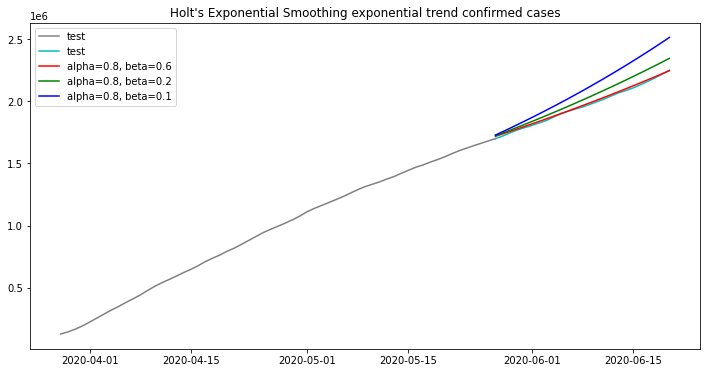

In [1660]:
fig, ax = plt.subplots(figsize=(12, 6))

ax.plot(traindates, rowstrain[0], label="test",color="grey")
ax.plot(testdates, rowstest[0], label="test",color="c")
ax.plot(testdates, pred1, label="alpha="+str(fit4.params['smoothing_level'])[:4]+", beta="+str(fit4.params['smoothing_slope'])[:4], color="red")
ax.plot(testdates, pred2, label="alpha="+str(fit5.params['smoothing_level'])[:4]+", beta="+str(fit5.params['smoothing_slope'])[:4], color="green")
ax.plot(testdates, pred3, label="alpha="+str(fit6.params['smoothing_level'])[:4]+", beta="+str(fit6.params['smoothing_slope'])[:4], color="blue")
plt.title("Holt's Exponential Smoothing exponential trend confirmed cases")
plt.legend();

In [1661]:
fit2.fittedvalues

2020-03-28    1.435440e+05
2020-03-29    1.454792e+05
2020-03-30    1.586131e+05
2020-03-31    1.795298e+05
2020-04-01    2.058219e+05
                  ...     
2020-05-23    1.626471e+06
2020-05-24    1.647169e+06
2020-05-25    1.667152e+06
2020-05-26    1.686043e+06
2020-05-27    1.704366e+06
Length: 61, dtype: float64

In [1662]:
fcast2 = fit2.forecast(5).rename("Exponential trend")
fcast2

2020-05-28    1.722660e+06
2020-05-29    1.744570e+06
2020-05-30    1.766480e+06
2020-05-31    1.788391e+06
2020-06-01    1.810301e+06
Freq: D, Name: Exponential trend, dtype: float64

#### Holt's Method Linear trend for Deaths

In [1663]:
#splitting into train and test data sets for confirmed cases
columns=confirmed.keys()

train=deaths_reported.loc[:, cols[76]:cols[136]]
test=deaths_reported.loc[:, cols[136]:cols[160]]

rowstrain=train.values.tolist()
rowstest=test.values.tolist()

trainkeys = train.keys()
testkeys = test.keys()

traindates=pd.to_datetime(trainkeys)
testdates=pd.to_datetime(testkeys)

In [1664]:
traindataseries =pd.Series(rowstrain[0], traindates)
testdataseries = pd.Series(rowstest[0], testdates)

In [1665]:
train

,4/3/2020,4/4/2020,4/5/2020,4/6/2020,4/7/2020,4/8/2020,4/9/2020,4/10/2020,4/11/2020,4/12/2020,...,5/24/2020,5/25/2020,5/26/2020,5/27/2020,5/28/2020,5/29/2020,5/30/2020,5/31/2020,6/1/2020,6/2/2020
0,9562,11165,12781,14523,17099,19249,21463,23649,25785,27674,...,101165,101762,102418,103896,104985,106102,107053,107674,108448,109428


In [1666]:
fit1 = Holt(traindataseries).fit(smoothing_level=0.8, smoothing_slope=0.2, optimized=False)

fit2 = Holt(traindataseries).fit(smoothing_level=0.7, smoothing_slope=0.8, optimized=False)

fit3 = Holt(traindataseries).fit(smoothing_level=0.5, smoothing_slope=0.9, optimized=True)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


In [1667]:
pred1=fit1.forecast(25)
pred2=fit2.forecast(25)
pred3=fit3.forecast(25)

In [1668]:
#mean Square error for predictions
sse1 = np.sqrt(np.mean(np.square(rowstest[0] - pred1.values)))
sse2 = np.sqrt(np.mean(np.square(rowstest[0] - pred2.values)))
sse3 = np.sqrt(np.mean(np.square(rowstest[0] - pred3.values)))


In [1669]:
sse1

3968.1929591371586

In [1670]:
sse2

2319.3017768351547

In [1671]:
sse3

793.5246622401

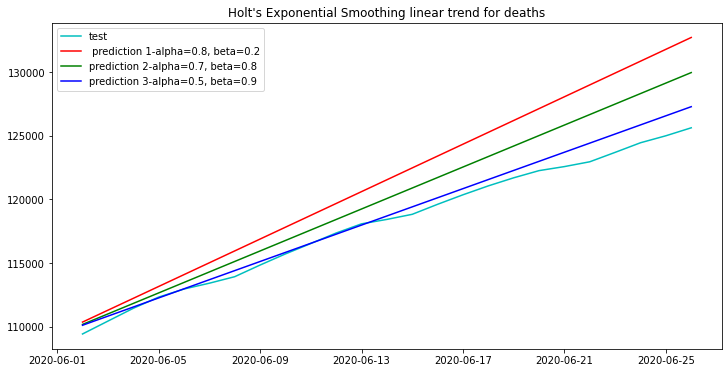

In [1672]:
#plotting the predictions plots with test data set to compare

fig, ax = plt.subplots(figsize=(12, 6))
ax.plot(testdates, rowstest[0], label="test",color="c")
ax.plot(testdates, pred1, label=" prediction 1-alpha="+str(fit1.params['smoothing_level'])[:4]+", beta="+str(fit1.params['smoothing_slope'])[:4], color="red")
ax.plot(testdates, pred2, label="prediction 2-alpha="+str(fit2.params['smoothing_level'])[:4]+", beta="+str(fit2.params['smoothing_slope'])[:4], color="green")
ax.plot(testdates, pred3, label="prediction 3-alpha="+str(fit3.params['smoothing_level'])[:4]+", beta="+str(fit3.params['smoothing_slope'])[:4], color="blue")
#ax.plot(traindates,rowstrain[0],label="train",color="grey")


plt.title("Holt's Exponential Smoothing linear trend for deaths")
plt.legend();

In [1673]:
fit1.fittedvalues

2020-04-03     11165.000000
2020-04-04     11229.120000
2020-04-05     12514.084800
2020-04-06     14106.584192
2020-04-07     15885.310600
                  ...      
2020-05-29    106013.447166
2020-05-30    107153.905422
2020-05-31    108126.652205
2020-06-01    108745.577209
2020-06-02    109440.949857
Length: 61, dtype: float64

In [1674]:
fcast1 = fit1.forecast(5).rename("Holt's linear trend")
fcast1

2020-06-03    110361.952409
2020-06-04    111293.314847
2020-06-05    112224.677284
2020-06-06    113156.039722
2020-06-07    114087.402159
Freq: D, Name: Holt's linear trend, dtype: float64

#### Holt's Method Exponential trend for Deaths

In [1675]:
fit4 = Holt(traindataseries).fit(smoothing_level=0.8, smoothing_slope=0.2, optimized=False)

fit5 = Holt(traindataseries).fit(smoothing_level=0.7, smoothing_slope=0.8, optimized=False)

fit6 = Holt(traindataseries).fit(smoothing_level=0.5, smoothing_slope=0.9, optimized=True)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


In [1676]:
pred1=fit4.forecast(25)
pred2=fit5.forecast(25)
pred3=fit6.forecast(25)

In [1677]:
#mean square Error for predictions from exponential trend in Holt's Method
sse1 = np.sqrt(np.mean(np.square(rowstest[0] - pred1.values)))
sse2 = np.sqrt(np.mean(np.square(rowstest[0] - pred2.values)))
sse3 = np.sqrt(np.mean(np.square(rowstest[0] - pred3.values)))

In [1678]:
sse1

3968.1929591371586

In [1679]:
sse2

2319.3017768351547

In [1680]:
sse3

793.5246622401

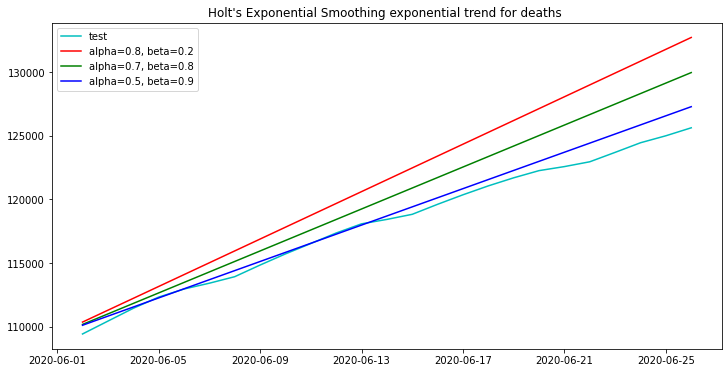

In [1681]:
fig, ax = plt.subplots(figsize=(12, 6))

#ax.plot(traindates, rowstrain[0], label="test",color="grey")
ax.plot(testdates, rowstest[0], label="test",color="c")
ax.plot(testdates, pred1, label="alpha="+str(fit4.params['smoothing_level'])[:4]+", beta="+str(fit4.params['smoothing_slope'])[:4], color="red")
ax.plot(testdates, pred2, label="alpha="+str(fit5.params['smoothing_level'])[:4]+", beta="+str(fit5.params['smoothing_slope'])[:4], color="green")
ax.plot(testdates, pred3, label="alpha="+str(fit6.params['smoothing_level'])[:4]+", beta="+str(fit6.params['smoothing_slope'])[:4], color="blue")
plt.title("Holt's Exponential Smoothing exponential trend for deaths ")
plt.legend();

In [1682]:
fit2.fittedvalues

2020-04-03     11165.000000
2020-04-04     10748.220000
2020-04-05     11978.682800
2020-04-06     13928.319272
2020-04-07     16065.631421
                  ...      
2020-05-29    106128.208563
2020-05-30    107325.181727
2020-05-31    108197.551909
2020-06-01    108600.773895
2020-06-02    109177.987109
Length: 61, dtype: float64

In [1683]:
fcast2 = fit2.forecast(5).rename("Exponential trend")
fcast2

2020-06-03    110177.158292
2020-06-04    111001.320452
2020-06-05    111825.482612
2020-06-06    112649.644772
2020-06-07    113473.806931
Freq: D, Name: Exponential trend, dtype: float64

#### Holt's Method Linear trend for Recovered cases

In [1684]:
#splitting into train and test data sets for confirmed cases
columns=confirmed.keys()

train=recovered_cases.loc[:, cols[70]:cols[130]]
test=recovered_cases.loc[:, cols[130]:cols[154]]

rowstrain=train.values.tolist()
rowstest=test.values.tolist()

trainkeys = train.keys()
testkeys = test.keys()

traindates=pd.to_datetime(trainkeys)
testdates=pd.to_datetime(testkeys)

In [1685]:
traindataseries =pd.Series(rowstrain[0], traindates)
testdataseries = pd.Series(rowstest[0], testdates)

In [1686]:
fit1 = Holt(traindataseries).fit(smoothing_level=0.8, smoothing_slope=0.2, optimized=False)

fit2 = Holt(traindataseries).fit(smoothing_level=0.8, smoothing_slope=0.1, optimized=False)

fit3 = Holt(traindataseries).fit(smoothing_level=0.8, smoothing_slope=0.8, optimized=True)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


In [1687]:
pred1=fit1.forecast(25)
pred2=fit2.forecast(25)
pred3=fit3.forecast(25)

In [1688]:
#mean Square error for predictions
sse1 = np.sqrt(np.mean(np.square(rowstest[0] - pred1.values)))
sse2 = np.sqrt(np.mean(np.square(rowstest[0] - pred2.values)))
sse3 = np.sqrt(np.mean(np.square(rowstest[0] - pred3.values)))


In [1689]:
sse1

24521.118378414852

In [1690]:
sse2

16856.953799387375

In [1691]:
sse3

47492.90163160665

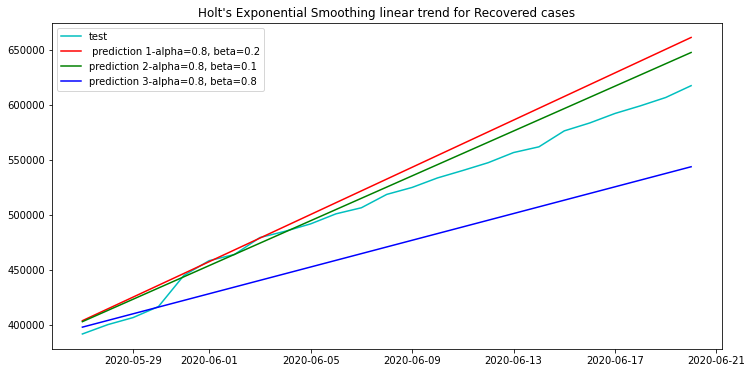

In [1692]:
#plotting the predictions plots with test data set to compare

fig, ax = plt.subplots(figsize=(12, 6))
ax.plot(testdates, rowstest[0], label="test",color="c")
ax.plot(testdates, pred1, label=" prediction 1-alpha="+str(fit1.params['smoothing_level'])[:4]+", beta="+str(fit1.params['smoothing_slope'])[:4], color="red")
ax.plot(testdates, pred2, label="prediction 2-alpha="+str(fit2.params['smoothing_level'])[:4]+", beta="+str(fit2.params['smoothing_slope'])[:4], color="green")
ax.plot(testdates, pred3, label="prediction 3-alpha="+str(fit3.params['smoothing_level'])[:4]+", beta="+str(fit3.params['smoothing_slope'])[:4], color="blue")
#ax.plot(traindates,rowstrain[0],label="train",color="grey")
plt.title("Holt's Exponential Smoothing linear trend for Recovered cases")
plt.legend();

In [1693]:
fit1.fittedvalues

2020-03-28      2665.000000
2020-03-29      2728.720000
2020-03-30      4005.668800
2020-03-31      6906.391552
2020-04-01      8609.353454
                  ...      
2020-05-23    355156.716369
2020-05-24    374844.142884
2020-05-25    381881.925326
2020-05-26    392790.293762
2020-05-27    398305.840447
Length: 61, dtype: float64

In [1694]:
fcast1 = fit1.forecast(5).rename("Holt's linear trend")
fcast1

2020-05-28    403606.095313
2020-05-29    414344.622536
2020-05-30    425083.149759
2020-05-31    435821.676982
2020-06-01    446560.204206
Freq: D, Name: Holt's linear trend, dtype: float64

#### Holt's Method Exponential trend for recovered cases

In [1695]:
fit4 = Holt(traindataseries, exponential=True).fit(smoothing_level=0.8, smoothing_slope=0.5, optimized=False)
fit5 = Holt(traindataseries,exponential=True).fit(smoothing_level=0.8, smoothing_slope=0.3, optimized=False)

fit6 = Holt(traindataseries,exponential=True).fit(smoothing_level=0.8, smoothing_slope=0.4, optimized=True)


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


In [1696]:
pred1=fit4.forecast(25)
pred2=fit5.forecast(25)
pred3=fit6.forecast(25)

In [1697]:
#mean square Error for predictions from exponential trend in Holt's Method
sse1 = np.sqrt(np.mean(np.square(rowstest[0] - pred1.values)))
sse2 = np.sqrt(np.mean(np.square(rowstest[0] - pred2.values)))
sse3 = np.sqrt(np.mean(np.square(rowstest[0] - pred3.values)))

In [1698]:
sse1

15274.439375057473

In [1699]:
sse2

90702.24766927202

In [1700]:
sse3

47230.89042711611

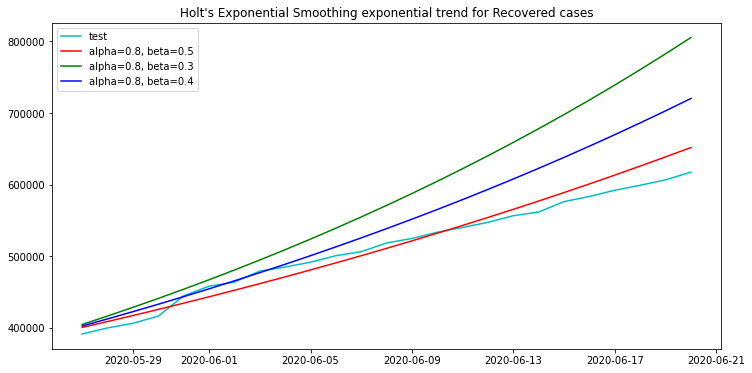

In [1701]:
fig, ax = plt.subplots(figsize=(12, 6))

#ax.plot(traindates, rowstrain[0], label="test",color="grey")
ax.plot(testdates, rowstest[0], label="test",color="c")
ax.plot(testdates, pred1, label="alpha="+str(fit4.params['smoothing_level'])[:4]+", beta="+str(fit4.params['smoothing_slope'])[:4], color="red")
ax.plot(testdates, pred2, label="alpha="+str(fit5.params['smoothing_level'])[:4]+", beta="+str(fit5.params['smoothing_slope'])[:4], color="green")
ax.plot(testdates, pred3, label="alpha="+str(fit6.params['smoothing_level'])[:4]+", beta="+str(fit6.params['smoothing_slope'])[:4], color="blue")
plt.title("Holt's Exponential Smoothing exponential trend for Recovered cases")
plt.legend();

In [1702]:
fit2.fittedvalues

2020-03-28      2665.000000
2020-03-29      2856.160000
2020-03-30      4153.499200
2020-03-31      6915.407104
2020-04-01      8580.476116
                  ...      
2020-05-23    351873.317210
2020-05-24    370643.952254
2020-05-25    378483.043083
2020-05-26    390041.577802
2020-05-27    396538.118522
Length: 61, dtype: float64

In [1703]:
fcast2 = fit2.forecast(5).rename("Exponential trend")
fcast2

2020-05-28    402719.817184
2020-05-29    412925.610663
2020-05-30    423131.404143
2020-05-31    433337.197622
2020-06-01    443542.991102
Freq: D, Name: Exponential trend, dtype: float64